In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.2 (v3.3.2:d047928ae3f6, May 13 2013, 13:52:24) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
1.9.2
0.16.2


Alright now we’re going to be working with the running data set. so let’s go ahead and import it. We’ll see again that it’s not converting the dates so we’ve got to do that manually. However it doesn’t work exactly like it worked last time.

In [2]:
df = pd.read_csv('../data/date_fixed_running_data.csv')

In [3]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN



This is because when you save a data frame to a csv it doesn’t label the index column. So now our column is actually the ‘zero’ column. When you use parse_dates you can use either the column name (if available) or the 0-based column index number. This happened because the index didn’t have a name when we saved the last csv.


In [4]:
df['Unnamed: 0'].head()

0    2014-08-02
1    2014-08-03
2    2014-08-04
3    2014-08-05
4    2014-08-06
Name: Unnamed: 0, dtype: object

In [5]:
df = pd.read_csv('../data/date_fixed_running_data.csv', parse_dates=['Date'])

ValueError: 'Date' is not in list

We can import the date correctly by specifying the zero based look up or by specifying the name like we did in the last video.

In [6]:
df = pd.read_csv('../data/date_fixed_running_data.csv', parse_dates=[0])

In [7]:
df.head()

,Unnamed: 0,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN



Let’s go ahead and rename the columns and set our index to the dates again. 


In [8]:
cols = ['Date', 'Miles', 'Time']
df.columns = cols
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


We can also rename the column using the rename method.

In [9]:
df.rename(columns={df.columns[0]:'Date'}, inplace=True)

In [10]:
df.head()

,Date,Miles,Time
0,2014-08-02,1.70,NaN
1,2014-08-03,1.40,NaN
2,2014-08-04,2.10,NaN
3,2014-08-05,0.00,NaN
4,2014-08-06,2.38,NaN


Now we can plot it again once we set the index.


In [11]:
df.set_index('Date', inplace=True)

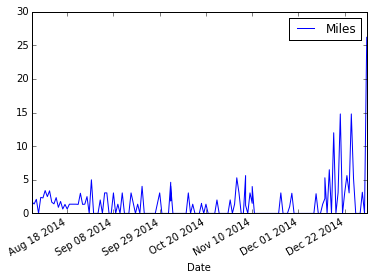

In [12]:
df.plot()

Now one thing we’re going to want to do is get a breakdown of times for each run. Stats like minutes per mile and that sort of thing.

To do that we’re going to use map. In order to convert to seconds we’re going to need to convert our times represented as hour/min/seconds into just pure seconds. From that we can do minutes etc.



Let’s go ahead and write our map function. Now there is an edge case that we need to handle. Remember we don’t have time data for every single run so we’ve got to handle the NaN values correctly. 

we'll do this by just keeping them in there.


In [16]:
raw_time_fmt = df.Time[0]

def get_total_seconds(raw_time):
    if raw_time is np.nan:
        return np.nan # if it's blank, keep it blank
    hrs, mins, seconds = str(raw_time).split(':')
    seconds = int(seconds) + 60 * int(mins) + 60 * 60 * int(hrs)
    return seconds    
print(get_total_seconds(raw_time_fmt))

nan


In [17]:
df['Seconds'] = df.Time.map(get_total_seconds)

In [18]:
df.head(10)

,Miles,Time,Seconds
Date,,,
2014-08-02,1.70,NaN,NaN
2014-08-03,1.40,NaN,NaN
2014-08-04,2.10,NaN,NaN
2014-08-05,0.00,NaN,NaN
2014-08-06,2.38,NaN,NaN
2014-08-07,2.30,NaN,NaN
2014-08-08,3.40,NaN,NaN
2014-08-09,2.50,NaN,NaN
2014-08-10,3.36,0:28:37,1717


Now we can describe and see I recorded times for 52 of the runs. 

In [19]:
df.describe()

,Miles,Seconds
count,166.000000,52.000000
mean,1.530964,1901.788462
std,2.979802,2560.424171
min,0.000000,376.000000
25%,0.000000,583.750000
50%,0.000000,1343.500000
75%,2.007500,1743.250000
max,26.200000,15643.000000


This is a great example of what  np.NaN is so great in pandas. When we do this describe we get answers unlike in numpy and it just disregards the empty values. If we were to fill it in with zeros that would drag down our statistics.

We can see that here. See how much it changes the data when it is filled with 0 which would be incorrect analysis.

In [20]:
df.fillna(0).describe()

,Miles,Seconds
count,166.000000,166.000000
mean,1.530964,595.740964
std,2.979802,1676.040290
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,2.007500,561.750000
max,26.200000,15643.000000


Now that we have seconds it would be useful to see minutes too. I find it hard to think in seconds.

So let’s add a new column. 

In [21]:
df['Minutes'] = df['Seconds'].map(lambda x: x / 60)

In [22]:
df.describe()

,Miles,Seconds,Minutes
count,166.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474
std,2.979802,2560.424171,42.673736
min,0.000000,376.000000,6.266667
25%,0.000000,583.750000,9.729167
50%,0.000000,1343.500000,22.391667
75%,2.007500,1743.250000,29.054167
max,26.200000,15643.000000,260.716667



Now let’s do a describe and plot it again.


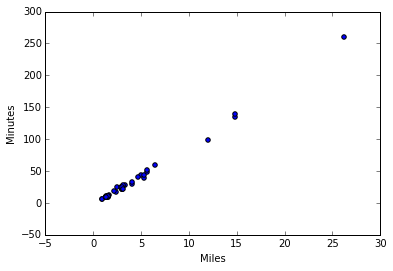

In [23]:
df.plot(x='Miles', y='Minutes', kind='scatter')


Let’s plot Miles and Minutes together in a scatter plot. Wow that’s linear. Let’s see how correlated they are. We do this with the cor method. We can see that Miles to time are very tightly correlated (using pearson standard correlation coefficients) there are two other correlation methods that you can use, kendall Tau, and Spearman rank correlation.


In [24]:
df.corr()

,Miles,Seconds,Minutes
Miles,1.000000,0.997203,0.997203
Seconds,0.997203,1.000000,1.000000
Minutes,0.997203,1.000000,1.000000


In [25]:
df.corr(method='kendall')

,Miles,Seconds,Minutes
Miles,1.00000,0.88305,0.88305
Seconds,0.88305,1.00000,1.00000
Minutes,0.88305,1.00000,1.00000


In [26]:
df.corr(method='spearman')

,Miles,Seconds,Minutes
Miles,1.00000,0.96482,0.96482
Seconds,0.96482,1.00000,1.00000
Minutes,0.96482,1.00000,1.00000



Now let’s see a box plot. With these two we get a much better idea of the data. We can see that most of my runs are below an hour except for a couple that are much longer.-


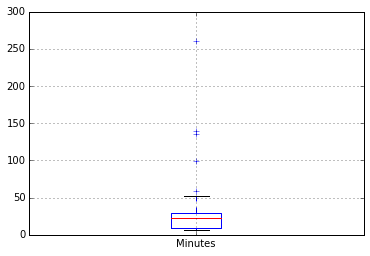

In [27]:
df.boxplot('Minutes', return_type='axes')


Now let’s add minutes per mile, we can just divide our two series to get those numbers.


In [28]:
df['Minutes'] / df['Miles']

Date
2014-08-02          NaN
2014-08-03          NaN
2014-08-04          NaN
2014-08-05          NaN
2014-08-06          NaN
2014-08-07          NaN
2014-08-08          NaN
2014-08-09          NaN
2014-08-10     8.516865
2014-08-11     7.854291
2014-08-12     7.453052
2014-08-13     7.411348
2014-08-14     6.962963
2014-08-14     6.962963
2014-08-15          NaN
2014-08-16          NaN
2014-08-17          NaN
2014-08-18          NaN
2014-08-19          NaN
2014-08-19          NaN
2014-08-20     6.970803
2014-08-21     6.861314
2014-08-22     6.630170
2014-08-23          NaN
2014-08-24          NaN
2014-08-25     6.508516
2014-08-25          NaN
2014-08-26     7.664234
2014-08-27    10.000000
2014-08-28          NaN
                ...    
2014-12-04          NaN
2014-12-05          NaN
2014-12-06          NaN
2014-12-07          NaN
2014-12-08          NaN
2014-12-09     8.532423
2014-12-10          NaN
2014-12-11          NaN
2014-12-12     6.751825
2014-12-13     8.226415
2014-12-13 

In [29]:
df['Min_per_mile'] = df['Minutes'] / df['Miles']

In [30]:
df.describe()

,Miles,Seconds,Minutes,Min_per_mile
count,166.000000,52.000000,52.000000,52.000000
mean,1.530964,1901.788462,31.696474,7.725297
std,2.979802,2560.424171,42.673736,0.954475
min,0.000000,376.000000,6.266667,6.000000
25%,0.000000,583.750000,9.729167,7.020479
50%,0.000000,1343.500000,22.391667,7.533333
75%,2.007500,1743.250000,29.054167,8.480023
max,26.200000,15643.000000,260.716667,10.000000



We can see that along more shorter distances, my speed can vary a lot.


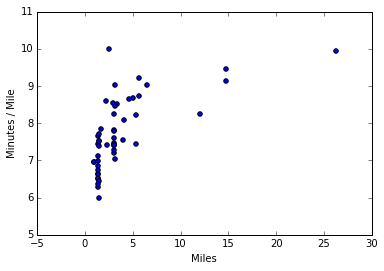

In [31]:
df.plot(x='Miles', y='Min_per_mile', kind='scatter')
plt.ylabel("Minutes / Mile")


Let’s see a histogram of my speeds. 
Histograms are a great way of representing frequency data or how much certain things are occuring.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1094f2090>]], dtype=object)

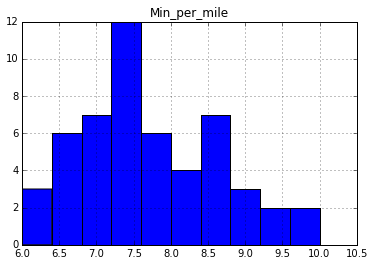

In [32]:
df.hist('Min_per_mile')


seems pretty center in that 7 minutes to 7.5 minute range. Let’s see if we can get more information with more bins which we specify with the bin argument.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1095b9390>]], dtype=object)

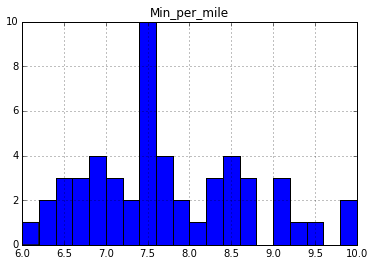

In [33]:
df.hist('Min_per_mile',bins=20)


That’s interesting. Under 7 and then at 7.5 are the most popular. I bet that has something to do with my running distances too or the courses I choose to run.


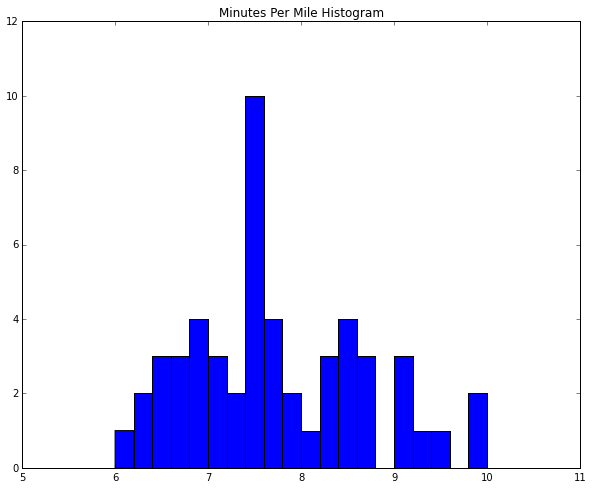

In [34]:
df.hist('Min_per_mile',bins=20, figsize=(10,8))
plt.xlim((5, 11))
plt.ylim((0, 12))
plt.title("Minutes Per Mile Histogram")
plt.grid(False)
plt.savefig('../assets/minutes_per_mile_histogram.png')

In [35]:
df['Miles']

Date
2014-08-02     1.70
2014-08-03     1.40
2014-08-04     2.10
2014-08-05     0.00
2014-08-06     2.38
2014-08-07     2.30
2014-08-08     3.40
2014-08-09     2.50
2014-08-10     3.36
2014-08-11     1.67
2014-08-12     1.42
2014-08-13     2.35
2014-08-14     0.90
2014-08-14     0.90
2014-08-15     1.78
2014-08-16     0.65
2014-08-17     1.34
2014-08-18     0.65
2014-08-19     1.37
2014-08-19     1.37
2014-08-20     1.37
2014-08-21     1.37
2014-08-22     1.37
2014-08-23     1.34
2014-08-24     3.00
2014-08-25     1.37
2014-08-25     1.34
2014-08-26     1.37
2014-08-27     2.50
2014-08-28     0.00
              ...  
2014-12-04     0.00
2014-12-05     0.00
2014-12-06     0.00
2014-12-07     0.00
2014-12-08     0.00
2014-12-09     2.93
2014-12-10     0.00
2014-12-11     0.00
2014-12-12     1.37
2014-12-13     5.30
2014-12-13     2.21
2014-12-14     0.00
2014-12-15     6.50
2014-12-16     0.00
2014-12-17    12.00
2014-12-18     0.00
2014-12-19     3.10
2014-12-20    14.80
2014-12-21     

Now another cool thing you can do with time series is see the rolling mean or rolling sum or even rolling correlations. There’s a lot of different “rolling” type things you can do.


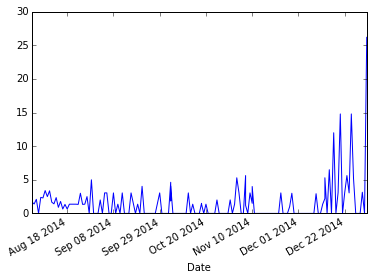

In [36]:
df['Miles'].plot()


So here’s a standard plot of our Miles again, just a line over time. To add another line to the same plot we just add more details to the box. As I was touching on the rolling values. Let’s talk about the rolling average. Now to do that I pass it a series or a data frame.


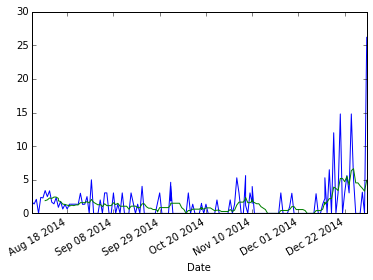

In [37]:
df['Miles'].plot()
pd.rolling_mean(df['Miles'], 7).plot()

I can do the same with the rolling standard deviation or sum.

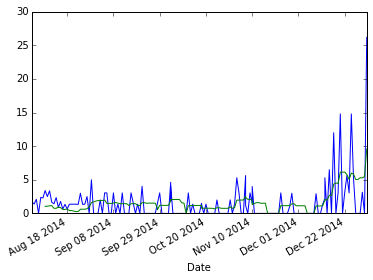

In [38]:
df['Miles'].plot()
pd.rolling_std(df['Miles'], 7).plot()

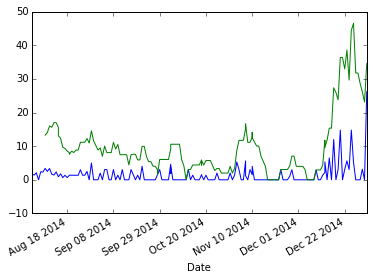

In [39]:
df['Miles'].plot()

pd.rolling_sum(df['Miles'], 7).plot()


Now on the last note one thing that’s cool about date time indexes is that you can query them very naturally. If I want to get all my runs in october of 2014, I just enter that as a string.

In [40]:
df.index

DatetimeIndex(['2014-08-02', '2014-08-03', '2014-08-04', '2014-08-05',
               '2014-08-06', '2014-08-07', '2014-08-08', '2014-08-09',
               '2014-08-10', '2014-08-11', 
               ...
               '2014-12-23', '2014-12-24', '2014-12-25', '2014-12-26',
               '2014-12-27', '2014-12-28', '2014-12-29', '2014-12-30',
               '2014-12-31', '2015-01-01'],
              dtype='datetime64[ns]', name='Date', length=166, freq=None, tz=None)


If I want to get from November to December, I can do that as a Series.


In [41]:
df['2014-11':'2014-12']

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-11-01,0.00,NaN,NaN,NaN,NaN
2014-11-02,1.37,0:08:43,523,8.716667,6.362530
2014-11-03,5.30,0:39:26,2366,39.433333,7.440252
2014-11-04,3.05,0:22:12,1332,22.200000,7.278689
2014-11-05,0.00,NaN,NaN,NaN,NaN
2014-11-06,0.00,NaN,NaN,NaN,NaN
2014-11-07,5.63,0:49:05,2945,49.083333,8.718176
2014-11-07,1.26,NaN,NaN,NaN,NaN
2014-11-07,1.20,NaN,NaN,NaN,NaN



How do you think we might go from october to January 1 2015?

Go ahead and give it a try and see if you can figure it out.


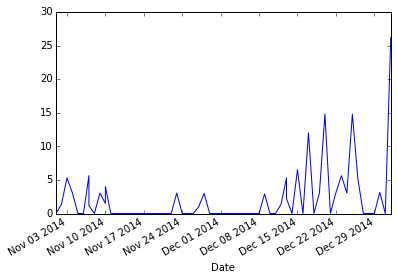

In [42]:
df['2014-11':'2015-1-1']['Miles'].plot()


Now we can specify a series this way but we can’t specific a specific date. To get a specific date’s run. 


In [43]:
df['2014-8-12']

KeyError: '2014-8-12'

To do that we need to use loc.

In [44]:
df.loc['2014-8-12']

Miles               1.42
Time             0:10:35
Seconds              635
Minutes         10.58333
Min_per_mile    7.453052
Name: 2014-08-12 00:00:00, dtype: object


now that we’ve done all this work. We should save it so that we don’t have to remember what our operations were or what stage we did them at. Now we could save it to csv like we did our other one but I wanted to illustrate all the different ways you can save this file.

Let’s save our csv, but we can also save it as an html page(which will give us a table view) or a json file.


In [45]:
df.head()

,Miles,Time,Seconds,Minutes,Min_per_mile
Date,,,,,
2014-08-02,1.70,NaN,NaN,NaN,NaN
2014-08-03,1.40,NaN,NaN,NaN,NaN
2014-08-04,2.10,NaN,NaN,NaN,NaN
2014-08-05,0.00,NaN,NaN,NaN,NaN
2014-08-06,2.38,NaN,NaN,NaN,NaN


In [46]:
df.to_csv('../data/date_fixed_running_data_with_time.csv')

In [47]:
df.to_html('../data/date_fixed_running_data_with_time.html')

One thing to note with JSON files is that they want unique indexes (because they're going to be come the keys), so we've got to give it a new index. We can do this by resetting our index or setting our index to a column.

In [48]:
df.to_json('../data/date_fixed_running_data_with_time.json')

ValueError: DataFrame index must be unique for orient='columns'.

In [49]:
df.reset_index()

,Date,Miles,Time,Seconds,Minutes,Min_per_mile
0,2014-08-02,1.70,NaN,NaN,NaN,NaN
1,2014-08-03,1.40,NaN,NaN,NaN,NaN
2,2014-08-04,2.10,NaN,NaN,NaN,NaN
3,2014-08-05,0.00,NaN,NaN,NaN,NaN
4,2014-08-06,2.38,NaN,NaN,NaN,NaN
5,2014-08-07,2.30,NaN,NaN,NaN,NaN
6,2014-08-08,3.40,NaN,NaN,NaN,NaN
7,2014-08-09,2.50,NaN,NaN,NaN,NaN
8,2014-08-10,3.36,0:28:37,1717,28.616667,8.516865
9,2014-08-11,1.67,0:13:07,787,13.116667,7.854291


In [50]:
df['Date'] = df.index

In [51]:
df.index = range(df.shape[0])

In [52]:
df.head()
df.to_json('../data/date_fixed_running_data_with_time.json')


Now there’s a LOT more you can do with date time indexing but this is about all that I wanted to cover in this video. We will get into more specifics later. By now you should be getting a lot more familiar with pandas and what the ipython + pandas workflow is.


In [53]:
df.Date[0]

Timestamp('2014-08-02 00:00:00')